## penguins.csv

### 1. Importação

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Leitura do dataset

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,2.0,36.7,19.3,193.0,3450.0,0.0
4,0.0,2.0,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
328,2.0,0.0,47.2,13.7,214.0,4925.0,0.0
329,2.0,0.0,46.8,14.3,215.0,4850.0,0.0
330,2.0,0.0,50.4,15.7,222.0,5750.0,1.0
331,2.0,0.0,45.2,14.8,212.0,5200.0,0.0


### 3. Definir um dataframe para cada especie

In [4]:
df['species'].unique()

array([0., 1., 2.])

In [5]:
filt = (df['species'] == 'Adelie')
df_adelie = df.loc[filt]

In [6]:
filt = (df['species'] == 'Gentoo')
df_gentoo = df.loc[filt]

In [7]:
filt = (df['species'] == 'Chinstrap')
df_chinstrap = df.loc[filt]

### 4. Exploração

In [8]:
df.shape

(333, 7)

In [9]:
df['species'].value_counts()

0.0    146
2.0    119
1.0     68
Name: species, dtype: int64

In [10]:
df.isnull().sum(axis=0)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
df.drop(['species', 'island', 'sex'], axis=1).skew()

culmen_length_mm     0.045340
culmen_depth_mm     -0.149720
flipper_length_mm    0.360148
body_mass_g          0.472246
dtype: float64

In [12]:
df.drop(['species', 'island', 'sex'], axis=1).kurt()

culmen_length_mm    -0.883418
culmen_depth_mm     -0.891960
flipper_length_mm   -0.961241
body_mass_g         -0.733489
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    float64
 1   island             333 non-null    float64
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(7)
memory usage: 18.3 KB


### 5. Análise
- Os pinguins Adelie são os que mais aparecem no conjunto de dados, seguidos pelas espécies Gentoo e Chinstrap.
- Os pinguins da amostra estão equilibrados em termos de sexo, existem exatamente 50% de dados masculinos e 50% de dados femininos.
- Metade dos pinguins está na Ilha Biscoe, uma minoria está na Ilha Torgersen e o restante está na Ilha dos Sonhos.

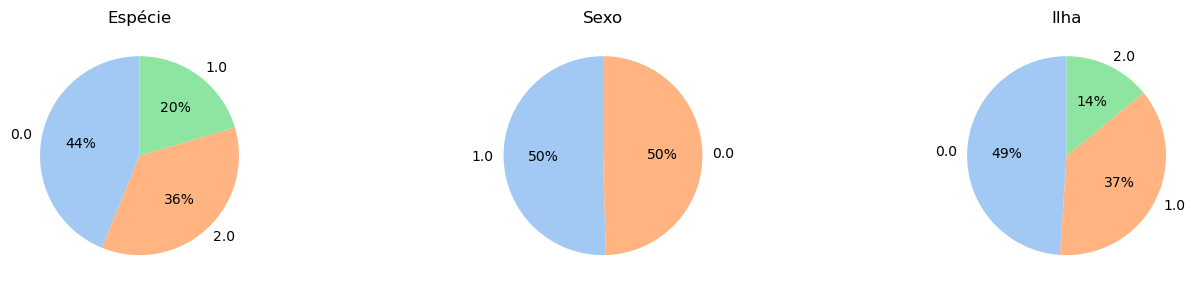

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))

ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Espécie')

ax1 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Sexo')

ax2 = plt.subplot2grid((1, 3), (0, 2))
count = df['island'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Ilha')

plt.tight_layout()

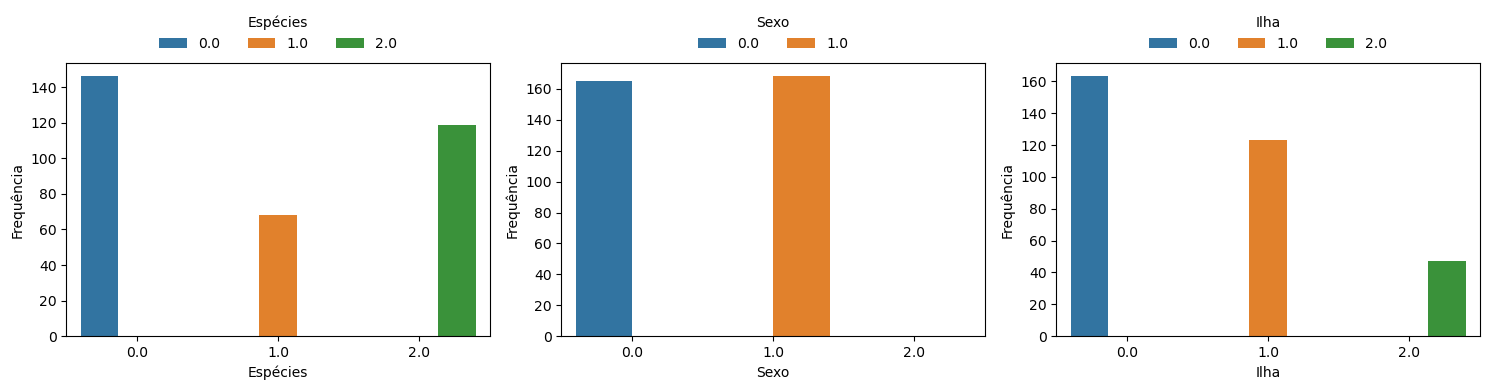

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.countplot(data=df, x='species', hue='species', ax=ax[0])
ax[0].set_ylabel('Frequência')
ax[0].set_xlabel('Espécies')
sns.move_legend(ax[0], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Espécies', frameon=False)

sns.countplot(data=df, x='sex', hue='sex', ax=ax[1])
ax[1].set_ylabel('Frequência')
ax[1].set_xlabel('Sexo')
sns.move_legend(ax[1], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Sexo', frameon=False)

sns.countplot(data=df, x='island', hue='island', ax=ax[2])
ax[2].set_ylabel('Frequência')
ax[2].set_xlabel('Ilha')
sns.move_legend(ax[2], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Ilha', frameon=False)

plt.tight_layout()
plt.show()

- Ao longo dos anos de amostragem, a quantidade de cada espécie tem se mantido relativamente estável, com pequenos aumentos e diminuições.
- A proporção de machos e fêmeas também tem se mantido estável, com um pequeno aumento em cada sexo a cada ano.
- Inicialmente, as ilhas Biscoe e Dream tinham quantidades semelhantes de pinguins, no entanto, em 2008, a ilha Biscoe apresentou um aumento considerável, enquanto a população em Dream diminuiu.

In [16]:
df.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


### Bico

- A mediana do comprimento do bico é de 44 mm.

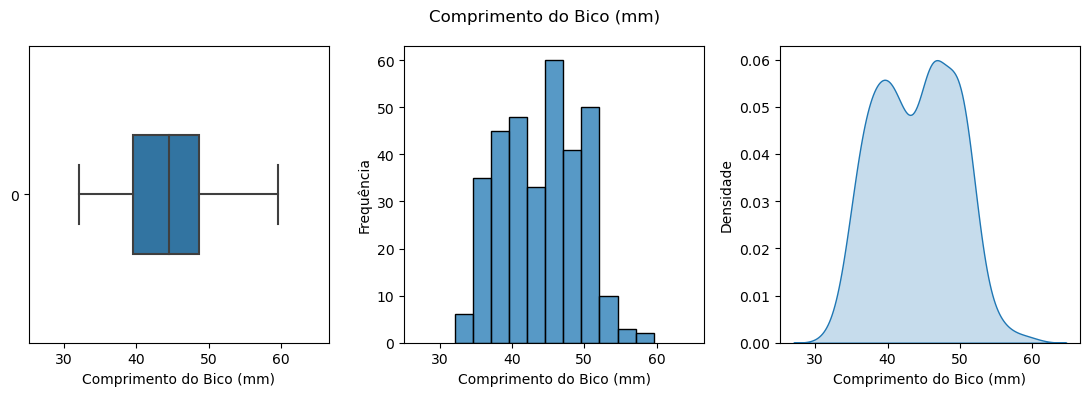

In [17]:
var = 'culmen_length_mm'
var_title = 'Comprimento do Bico (mm)'

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequência')

# Curva de densidade
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidade')

fig.suptitle(var_title)

plt.tight_layout()
plt.show()

### Nadadeira

- A nadadeira possui uma mediana de 197 mm.

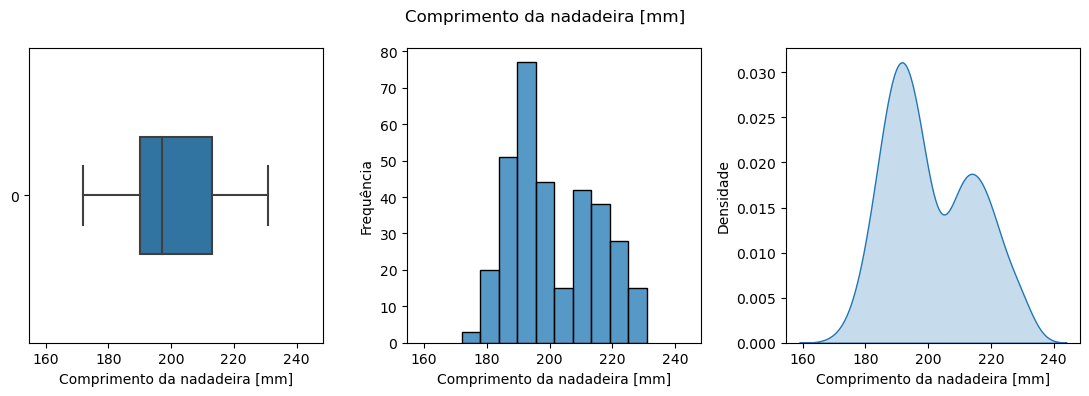

In [18]:
var = 'flipper_length_mm'
var_title = 'Comprimento da nadadeira [mm]'
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequência')

# Curva de densidade
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidade')

fig.suptitle(var_title)

plt.tight_layout()

### Massa corporal

- Os pinguins têm uma massa corporal geralmente em torno de 4 kg.

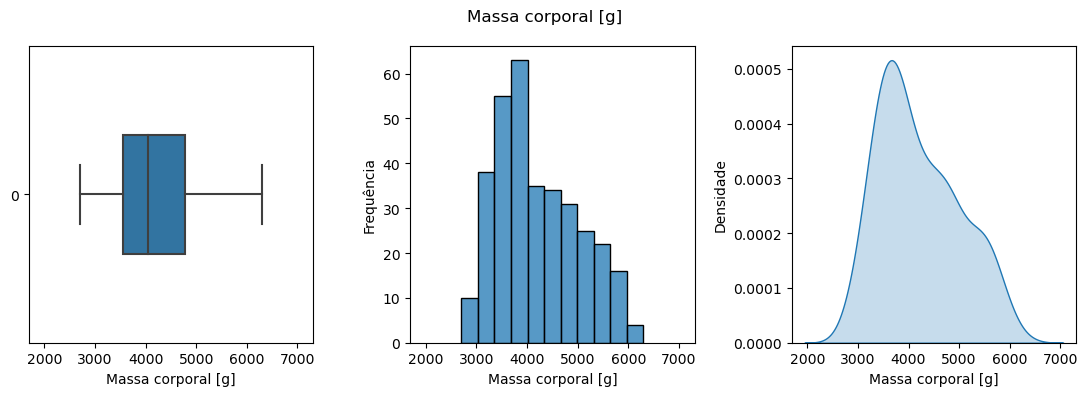

In [19]:
var = 'body_mass_g'
var_title = 'Massa corporal [g]'
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequência')

# Curva de densidade
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidade')

fig.suptitle(var_title)

plt.tight_layout()

### Massa corporal comparado a cada espécies

- Gentoo pesa em torno de 5 kg.
- Adelie/Chinstrap pesam em torno de 3 e 4 kg.

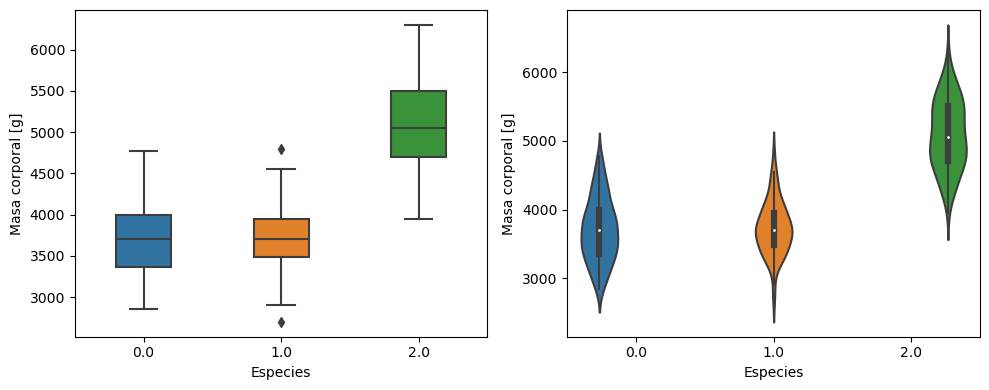

In [20]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Diagrama de violino
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()

plt.tight_layout()

### 6. Conclusão EDA

- Os pinguins da espécie Gentoo são os mais fáceis de distinguir:
    - Eles têm uma profundidade de pico menor.
    - Possuem uma maior comprimento de nadadeira e massa corporal em comparação com as outras espécies.
- Os pinguins da espécie Adelie geralmente têm um comprimento de bico menor.
- As espécies Adelie e Chinstrap geralmente possuem características mistas e às vezes são difíceis de separar.

### 7. DecisionTree / RandomForest

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,2.0,36.7,19.3,193.0,3450.0,0.0
4,0.0,2.0,39.3,20.6,190.0,3650.0,1.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    float64
 1   island             333 non-null    float64
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(7)
memory usage: 20.8 KB


In [48]:
species_labels = ['species']
df = pd.get_dummies(df, columns=species_labels, drop_first=False)

In [49]:
island_labels = ['island']
df = pd.get_dummies(df, columns=island_labels, drop_first=False)

In [50]:
sex_labels = ['sex']
df = pd.get_dummies(df, columns=sex_labels, drop_first=False)

In [51]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_0.0,species_1.0,species_2.0,island_0.0,island_1.0,island_2.0,sex_0.0,sex_1.0
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
3,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
4,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
329,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
330,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
331,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


### Decision Tree

In [52]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_0.0', 'species_1.0', 'species_2.0',
       'island_0.0', 'island_1.0', 'island_2.0', 'sex_0.0', 'sex_1.0'],
      dtype='object')

In [53]:
x = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Treinamento **

In [61]:
dtree = DecisionTreeClassifier()

In [63]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

** Prevendo os dados **

In [65]:
predictions = dtree.predict(x_test)

In [71]:
print(classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

      2900.0       0.00      0.00      0.00         1
      2925.0       1.00      0.00      0.00         1
      3000.0       1.00      0.00      0.00         2
      3050.0       0.00      0.00      0.00         1
      3100.0       0.00      1.00      0.00         0
      3150.0       0.00      1.00      0.00         0
      3175.0       1.00      0.00      0.00         1
      3200.0       1.00      0.00      0.00         2
      3250.0       0.00      0.00      0.00         2
      3275.0       0.00      1.00      0.00         0
      3300.0       0.00      0.00      0.00         2
      3325.0       1.00      0.00      0.00         3
      3350.0       0.00      0.00      0.00         2
      3400.0       0.00      0.00      0.00         2
      3425.0       1.00      0.00      0.00         2
      3450.0       0.00      0.00      0.00         1
      3475.0       1.00      0.00      0.00         1
      3500.0       0.20    

In [72]:
print(confusion_matrix(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Random Forest

** Treinamento **

In [73]:
rfc = RandomForestClassifier(n_estimators=200)

In [74]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

** Prevendo os dados **

In [75]:
predictions = rfc.predict(x_test)

In [77]:
print(classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

      2700.0       0.00      1.00      0.00         0
      2900.0       0.00      0.00      0.00         1
      2925.0       1.00      0.00      0.00         1
      3000.0       1.00      0.00      0.00         2
      3050.0       0.00      0.00      0.00         1
      3150.0       0.00      1.00      0.00         0
      3175.0       0.00      0.00      0.00         1
      3200.0       0.00      0.00      0.00         2
      3250.0       0.00      0.00      0.00         2
      3275.0       0.00      1.00      0.00         0
      3300.0       0.00      0.00      0.00         2
      3325.0       0.00      0.00      0.00         3
      3350.0       0.00      0.00      0.00         2
      3400.0       0.00      0.00      0.00         2
      3425.0       1.00      0.00      0.00         2
      3450.0       0.00      0.00      0.00         1
      3475.0       1.00      0.00      0.00         1
      3500.0       0.17    

In [78]:
print(confusion_matrix(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
